Ejercicio P.2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D




dataset = pd.read_csv('../dataset/Dataset1.csv')

dataset.head()
#Mx = dataset.drop(columns=["Species"]).values

,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


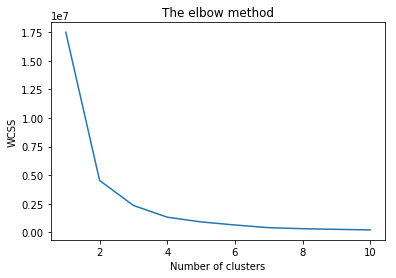

In [2]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [2]:
%matplotlib notebook

def view3D(X, y, model = decomposition.PCA):
    fig = plt.figure(1,figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    X_reduced = model(n_components=3).fit_transform(X)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
             cmap=plt.cm.Set1, edgecolor='k', s=40)
    ax.set_title("First three PCA directions")
    ax.set_xlabel("1st eigenvector")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.w_zaxis.set_ticklabels([])
    plt.show()

<IPython.core.display.Javascript object>


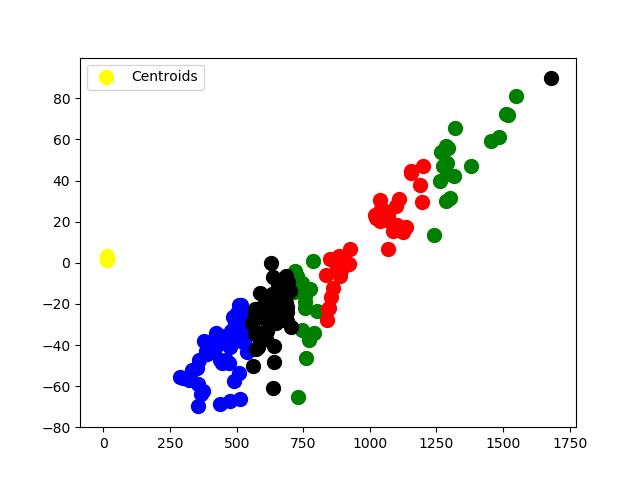

In [3]:
%matplotlib notebook



kmeans = KMeans(n_clusters = 13, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(dataset)


x = decomposition.TruncatedSVD(n_components=3).fit_transform(dataset)


#Visualising the clusters
col = ['red','blue','green','black','red','blue','green','black','red','blue','green','black','red','blue','green','black']

for i in range(0,12):

    plt.scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 1], s = 100, c = col[i])



#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

#view3D(x[y_kmeans == i, 0], x[y_kmeans == i, 1])
